<a href="https://colab.research.google.com/github/sapkotasriyas/MachineLearning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ref_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
ref_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [4]:
ref_df['Sex'] = (ref_df['Sex']=='male').astype(int)

In [5]:
ref_df['Sex'].unique()

array([1, 0])

<Axes: xlabel='Sex'>

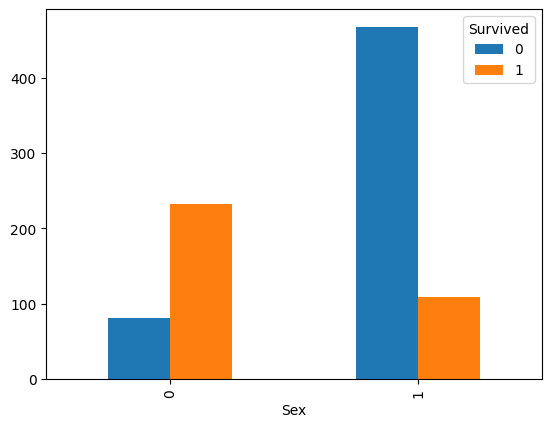

In [6]:
pd.crosstab(ref_df.Sex, ref_df.Survived).plot(kind='bar')

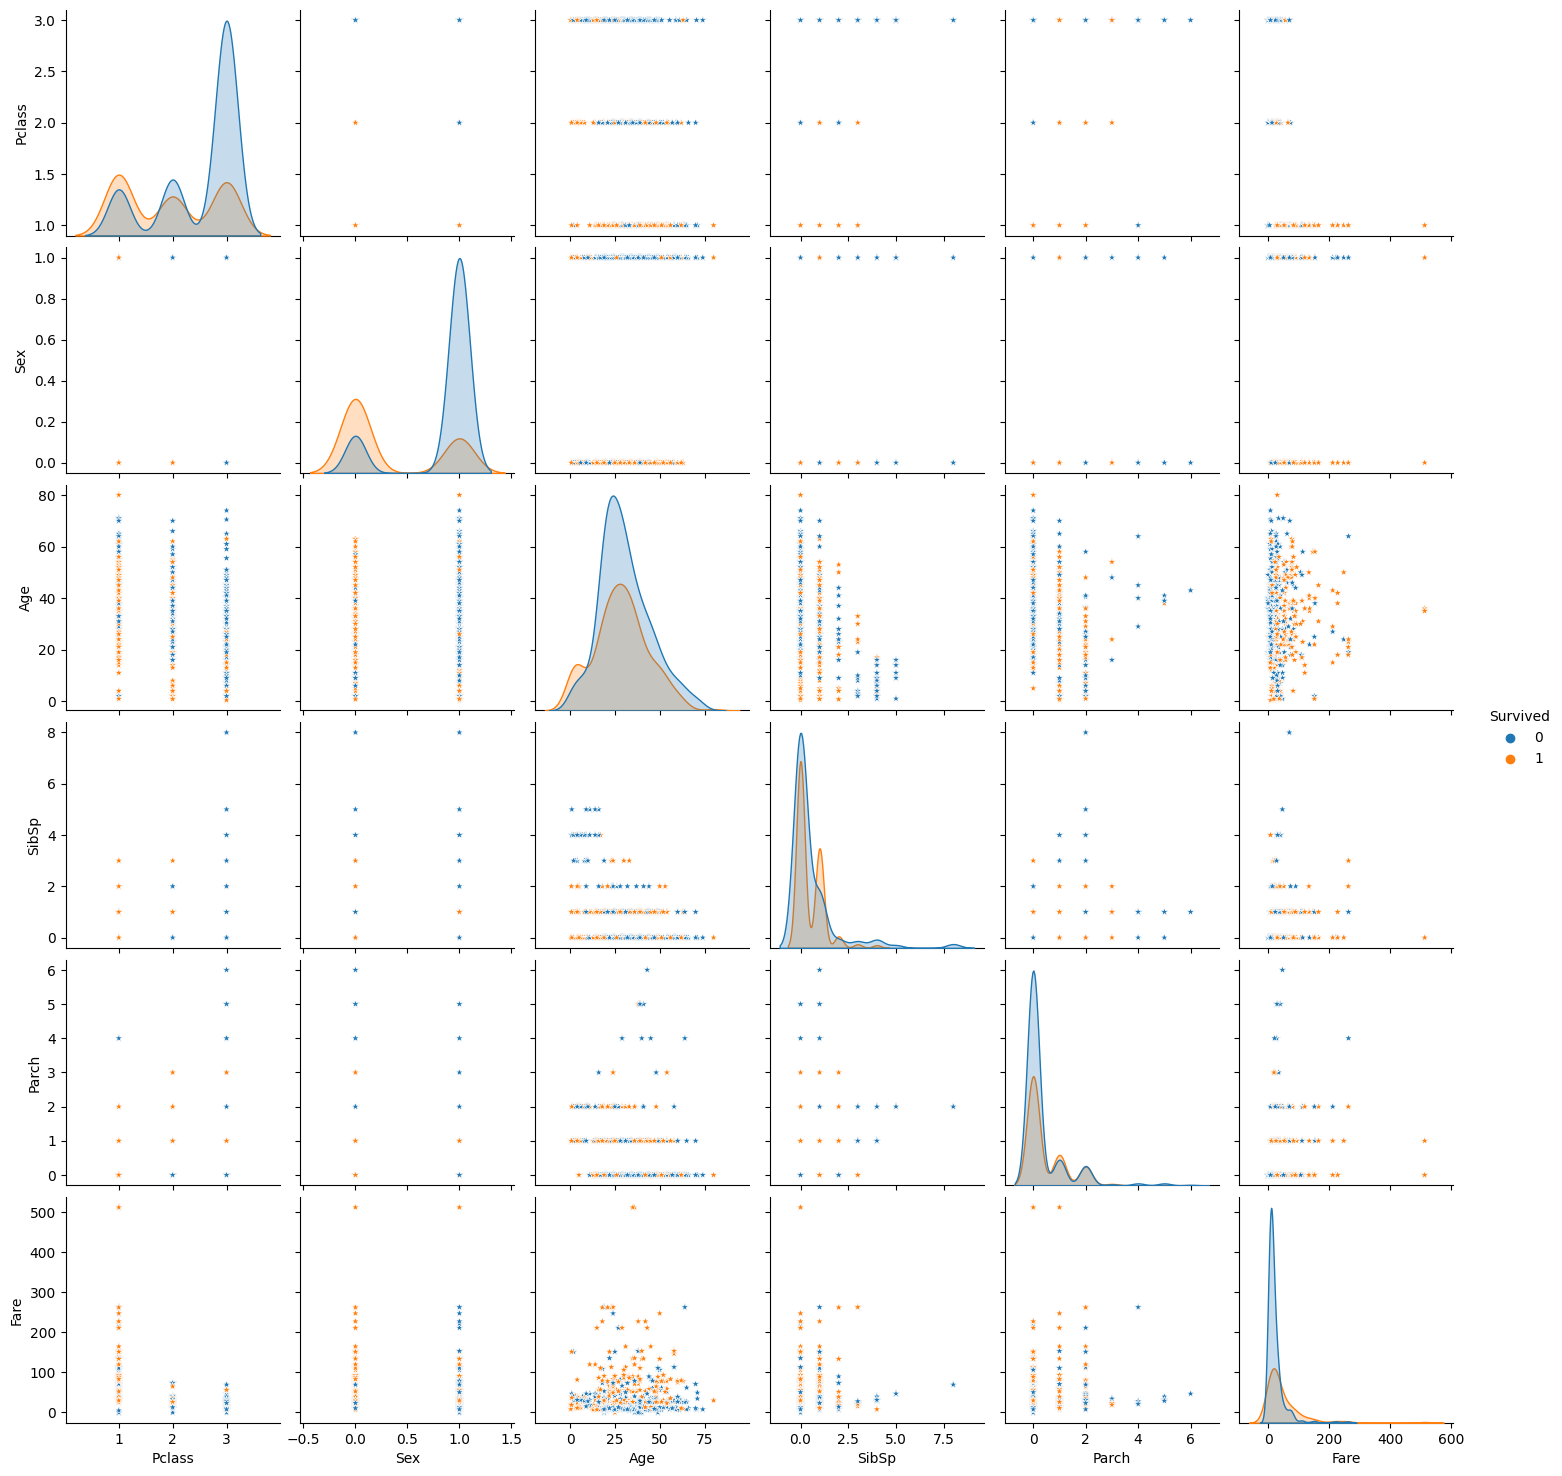

In [7]:
g = sns.pairplot(ref_df, hue='Survived', markers = '*')

In [8]:
X = ref_df.drop('Survived', axis = 1)
y = ref_df.Survived

In [9]:
X['Age'].dropna(inplace = True)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [10]:
X = X.fillna(X.mean())

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [12]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
ref_tdf = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
ref_tdf

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [14]:
X_test = ref_tdf.fillna(ref_tdf.mean())
X_test

<ipython-input-14-5dacfa1b1024>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test = ref_tdf.fillna(ref_tdf.mean())


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50000,0,0,7.8292
1,3,female,47.00000,1,0,7.0000
2,2,male,62.00000,0,0,9.6875
3,3,male,27.00000,0,0,8.6625
4,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500
414,1,female,39.00000,0,0,108.9000
415,3,male,38.50000,0,0,7.2500
416,3,male,30.27259,0,0,8.0500


In [15]:
X_test['Sex'] = (X_test['Sex']=='male').astype(int)

In [16]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [18]:
ytest = pd.read_csv('gender_submission.csv')
ytest

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [19]:
y_test = ytest.drop(['PassengerId'], axis=1)
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [20]:
knn_model = KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [21]:
y_predict = knn_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       266
           1       0.58      0.32      0.42       152

    accuracy                           0.67       418
   macro avg       0.64      0.60      0.59       418
weighted avg       0.65      0.67      0.64       418



In [22]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [23]:
log_model = LogisticRegression()
log_model.fit(X,y)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [24]:
y_test.head(20)

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [25]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) *100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [26]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men) * 100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [27]:
display(X_test, y_pred)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500
414,1,0,39.00000,0,0,108.9000
415,3,1,38.50000,0,0,7.2500
416,3,1,30.27259,0,0,8.0500


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [28]:
display(X_test, y_test)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500
414,1,0,39.00000,0,0,108.9000
415,3,1,38.50000,0,0,7.2500
416,3,1,30.27259,0,0,8.0500


,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [29]:
output = pd.DataFrame({'PassengerId': ytest.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [30]:
cmb = pd.merge(test_df, output)
check = cmb.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
check

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,male,34.5,0,0,7.8292,0
1,893,3,female,47.0,1,0,7.0000,0
2,894,2,male,62.0,0,0,9.6875,0
3,895,3,male,27.0,0,0,8.6625,0
4,896,3,female,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,0
414,1306,1,female,39.0,0,0,108.9000,1
415,1307,3,male,38.5,0,0,7.2500,0
416,1308,3,male,NaN,0,0,8.0500,0


In [31]:
women = check.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) *100

print("% of women who survived:", rate_women)

% of women who survived: 33.75


In [32]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) *100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095
